<a href="https://colab.research.google.com/github/AlapatiNithika/BharatIntern-Tasks/blob/main/BharatIntern_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK-2**

**Titanic Classification**

Make a system which tells whether the person will be
save from sinking. What factors were
most likely lead to success-socio-economic
status, age, gender and more.

---



In [37]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#load and explore the dataset
titanic_df = pd.read_csv('/content/drive/MyDrive/train_and_test2.csv')

print(titanic_df.head())
print(titanic_df.info())
print(titanic_df.describe())


   Passengerid   Age     Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0            1  22.0   7.2500    0      1     0       0       0       0   
1            2  38.0  71.2833    1      1     0       0       0       0   
2            3  26.0   7.9250    1      0     0       0       0       0   
3            4  35.0  53.1000    1      1     0       0       0       0   
4            5  35.0   8.0500    0      0     0       0       0       0   

   zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
0       0  ...        0        0        0       3        0        0       2.0   
1       0  ...        0        0        0       1        0        0       0.0   
2       0  ...        0        0        0       3        0        0       2.0   
3       0  ...        0        0        0       1        0        0       2.0   
4       0  ...        0        0        0       3        0        0       2.0   

   zero.17  zero.18  2urvived  
0        0        0         0 

In [5]:
#Data Preprocessing
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)


In [6]:
#Encode categorical features
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)


In [9]:
#Split data into features and target
X = titanic_df.drop(['2urvived'], axis=1)
y = titanic_df['2urvived']


In [10]:
 #Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
#Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
#Make predictions
y_pred = clf.predict(X_test)


In [13]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(report)


Accuracy: 87.40%

Confusion Matrix:
[[176  13]
 [ 20  53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       189
           1       0.80      0.73      0.76        73

    accuracy                           0.87       262
   macro avg       0.85      0.83      0.84       262
weighted avg       0.87      0.87      0.87       262



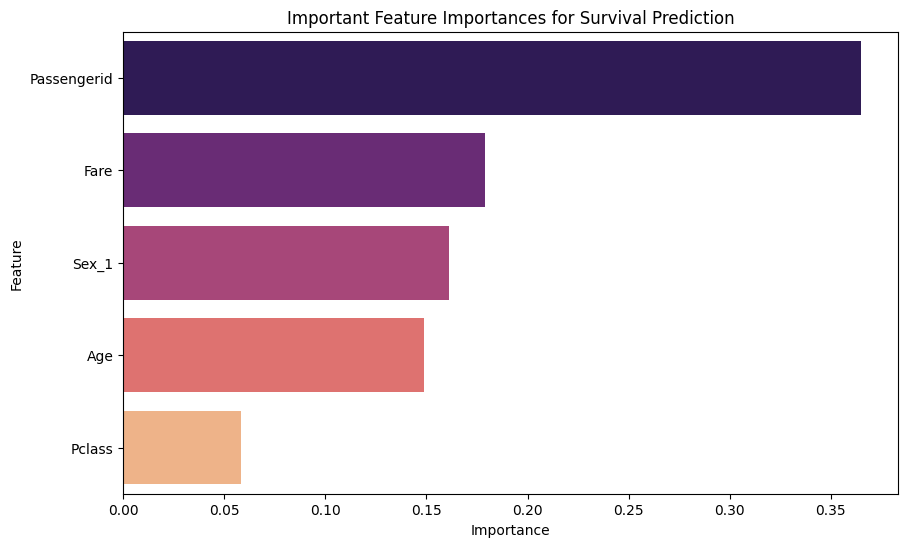

Important Feature Importances:
        Feature  Importance
0   Passengerid    0.364926
2          Fare    0.178951
25        Sex_1    0.161322
1           Age    0.148916
20       Pclass    0.058380


In [21]:
#Determining important features
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
threshold = 0.05
important_features_df = feature_importance_df[feature_importance_df['Importance'] >= threshold]
important_features_df = important_features_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=important_features_df, x='Importance', y='Feature', palette='magma')
plt.title('Important Feature Importances for Survival Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
print("Important Feature Importances:")
print(important_features_df)


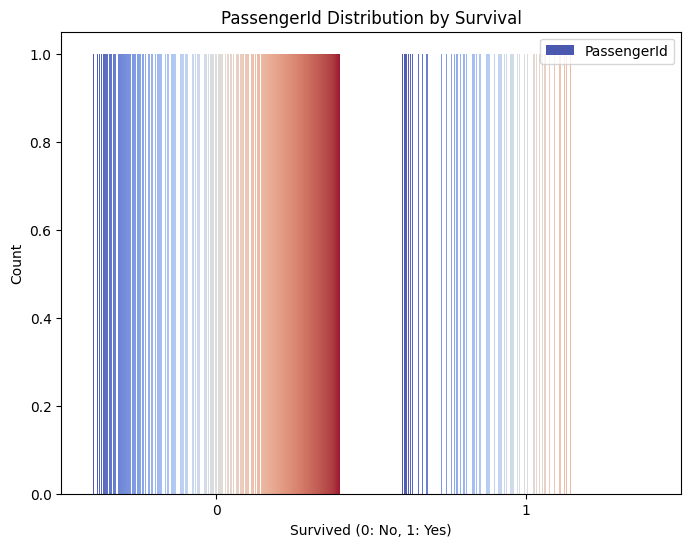

In [30]:
#Visualize Passengerid Distribution by Survival
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, x='2urvived', hue='Passengerid', palette='coolwarm')
plt.title('PassengerId Distribution by Survival')
plt.xlabel('Survived (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(['PassengerId'])
plt.show()


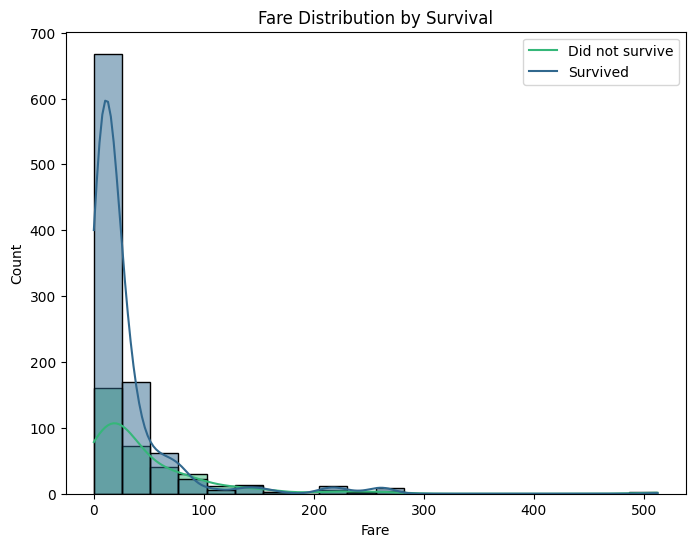

In [39]:
#Visualize Fare Distribution by Survival
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic_df, x='Fare', hue='2urvived', kde=True, bins=20, palette='viridis')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()


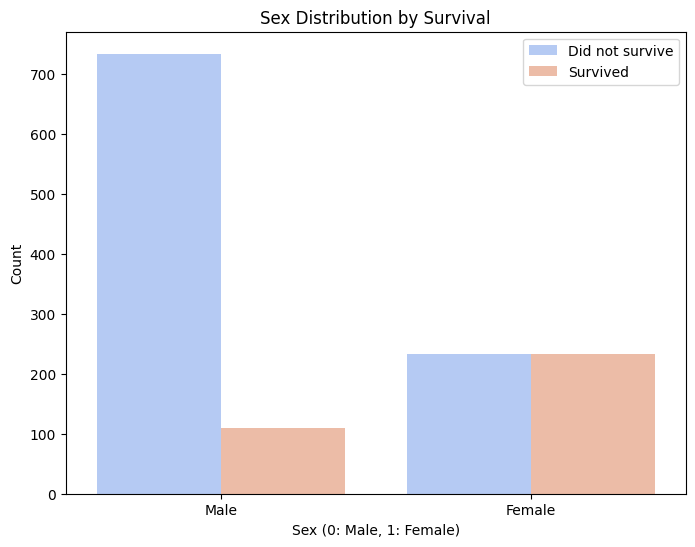

In [40]:
#Visualize Sex Distribution by Survival
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, x='Sex_1', hue='2urvived', palette='coolwarm')
plt.title('Sex Distribution by Survival')
plt.xlabel('Sex (0: Male, 1: Female)')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()


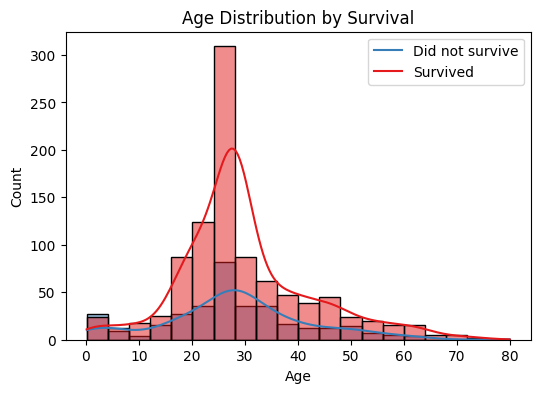

In [38]:
#Visualize Age Distribution by Survival
plt.figure(figsize=(6, 4))
sns.histplot(data=titanic_df, x='Age', hue='2urvived', kde=True, bins=20, palette='Set1')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()

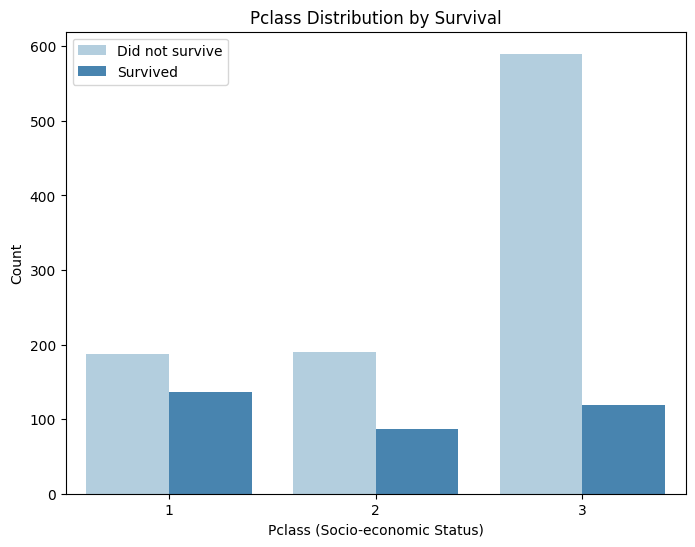

In [31]:
#Visualize Pclass Distribution by Survival
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, x='Pclass', hue='2urvived', palette='Blues')
plt.title('Pclass Distribution by Survival')
plt.xlabel('Pclass (Socio-economic Status)')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()
